## **1. Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression  # for Linear regression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## **2. Load the dataset into the tool.**

In [ ]:
#reading the csv file
df=pd.read_csv('abalone.csv')

In [ ]:
#printing the top rows of the dataframe
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


*Adding age column to the dataframe*


In [ ]:
df['Age']=df['Rings']+1.5

In [ ]:
df.shape

(4177, 10)

In [ ]:
df.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


## **3. Perform Below Visualizations.**


### **3.1 Univariate Analysis**

In [ ]:
df.dtypes


Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Age               float64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

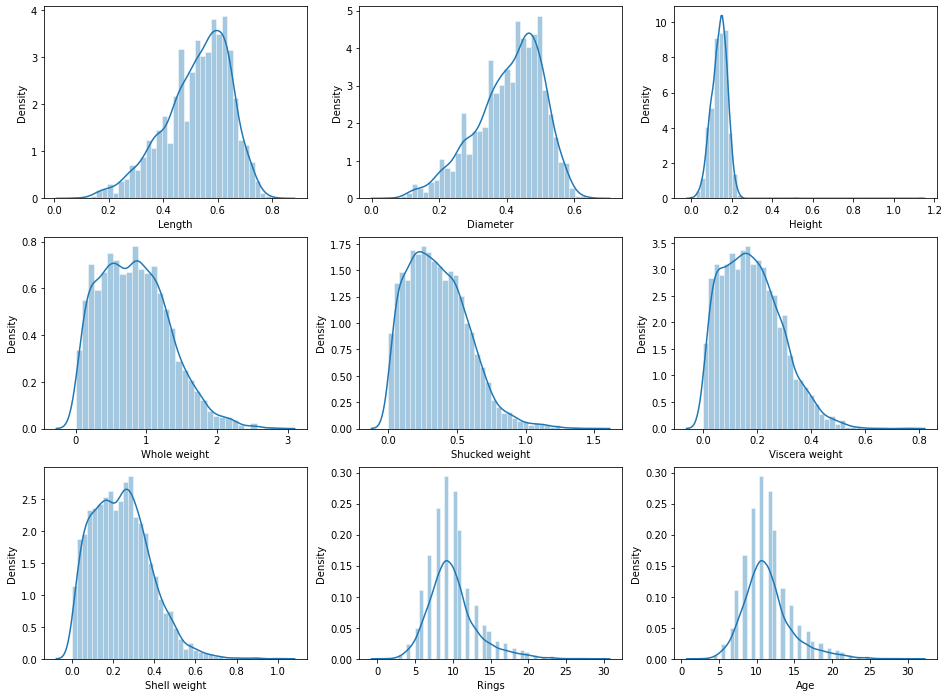

In [ ]:
fig, ax = plt.subplots(figsize=(16,12), ncols=3, nrows=3)
sns.set_style("dark")
sns.set_context("notebook")

sns.distplot(df['Length'],kde =True, ax=ax[0][0])
sns.distplot(df['Diameter'],   kde =True, ax=ax[0][1])
sns.distplot(df['Height'],  kde =True, ax=ax[0][2])
sns.distplot(df['Whole weight'],  kde =True, ax=ax[1][0])
sns.distplot(df['Shucked weight'],  kde =True, ax=ax[1][1])
sns.distplot(df['Viscera weight'],  kde =True, ax=ax[1][2])
sns.distplot(df['Shell weight'],  kde =True, ax=ax[2][0])
sns.distplot(df['Rings'],  kde =True, ax=ax[2][1])
sns.distplot(df['Age'],  kde =True, ax=ax[2][2])


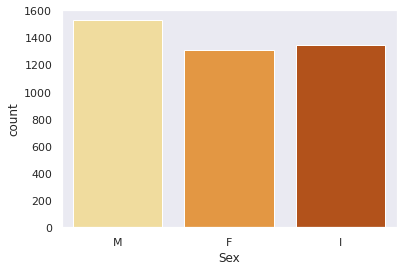

In [ ]:

sns.countplot(x=df["Sex"],palette='YlOrBr')

### **3.2 Bi-variate Analysis**

In [ ]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Age               float64
dtype: object

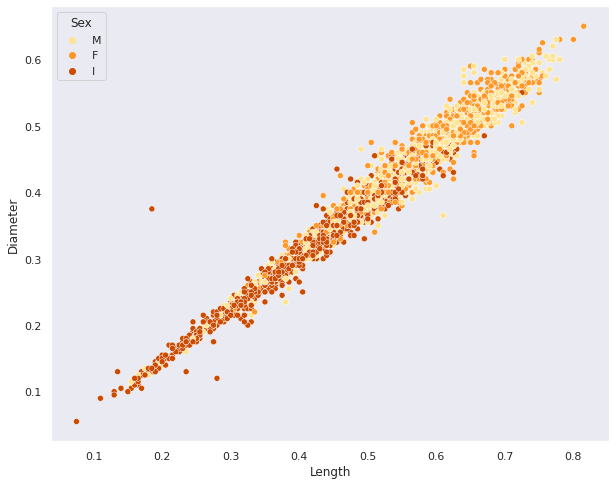

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="Length", y="Diameter", hue="Sex",palette = "YlOrBr")


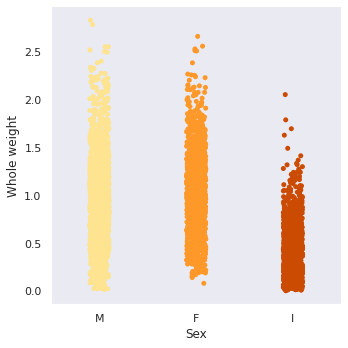

In [ ]:
sns.catplot(data=df, x="Sex", y="Whole weight",palette = "YlOrBr")

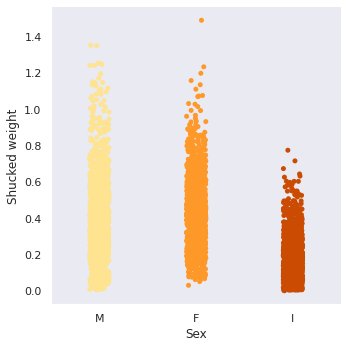

In [ ]:
sns.catplot(data=df, x="Sex", y="Shucked weight",palette = "YlOrBr")

### **3.3 Multi-Variate Analysis**

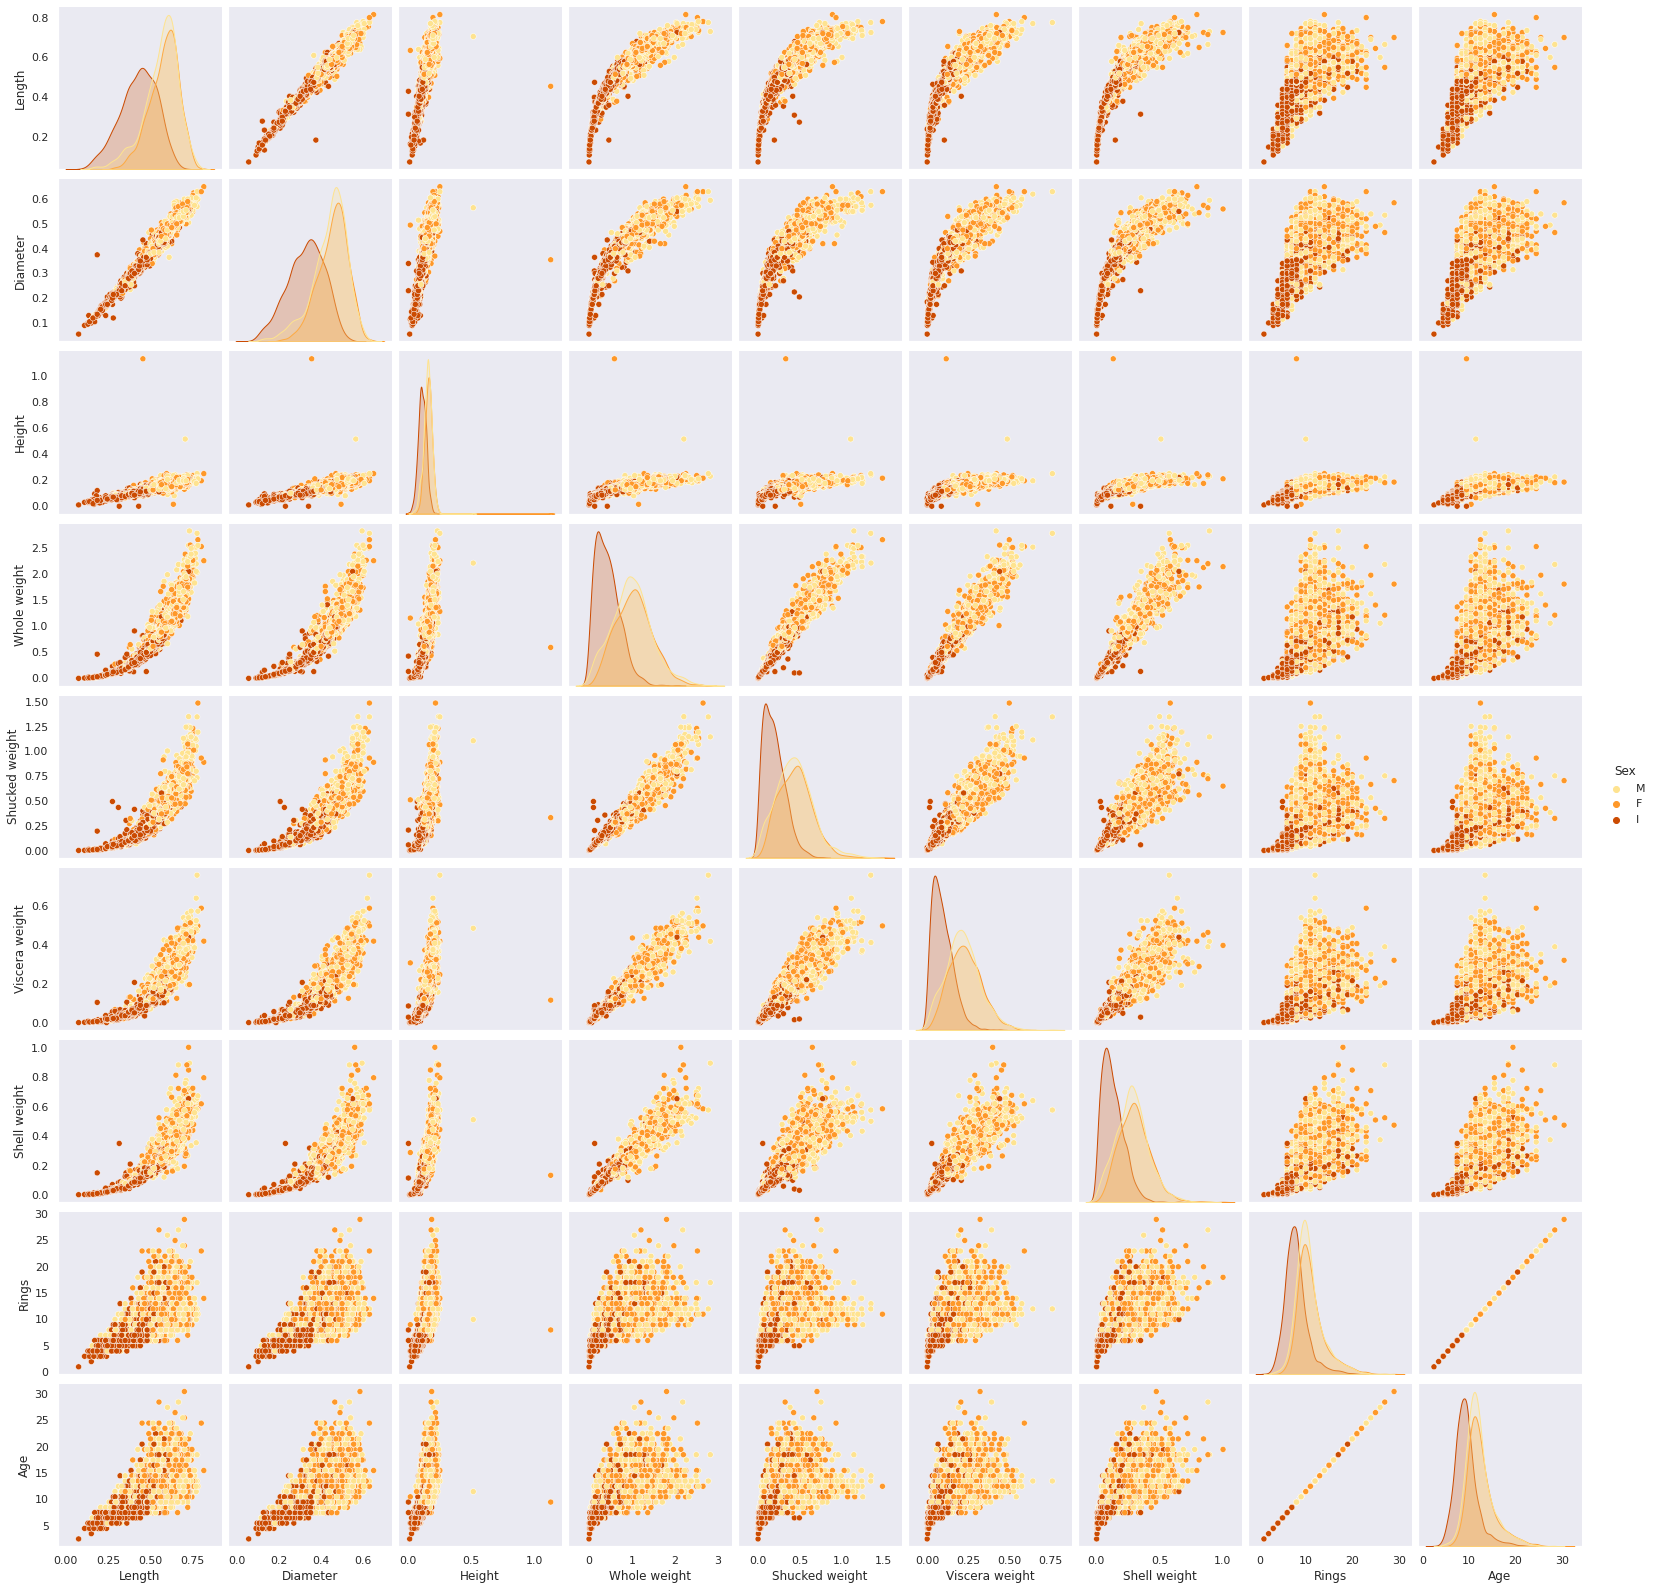

In [ ]:
sns.pairplot(df,hue='Sex',palette="YlOrBr")
plt.show()

## **4. Perform descriptive statistics on the dataset.**


In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [ ]:
df.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000


In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Age               1.114102
dtype: float64

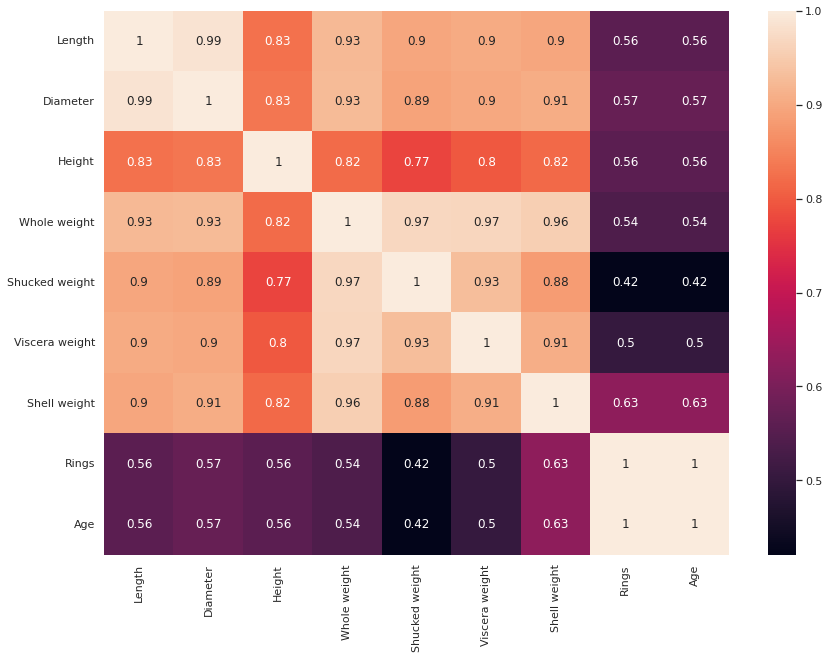

In [ ]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## **5. Check for Missing values and deal with them.**


In [ ]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

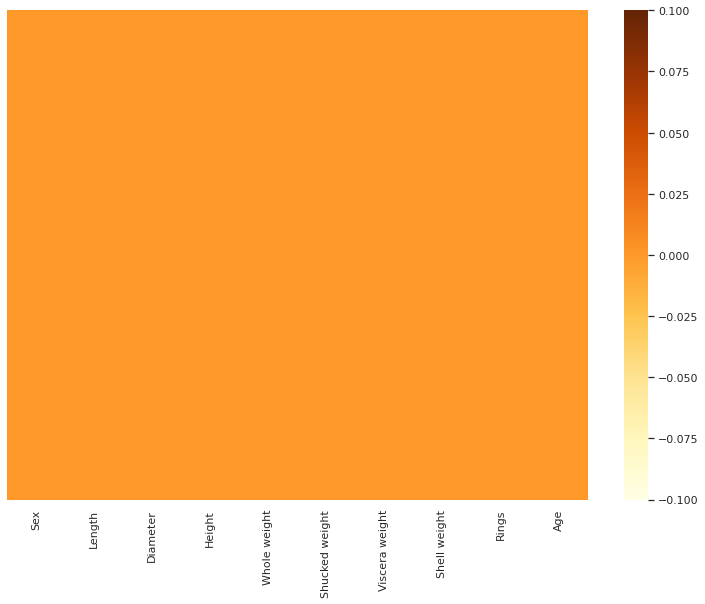

In [ ]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.isnull(),yticklabels=False,cmap="YlOrBr")

***As there are no missing values in the dataset there is no need of handling them.***

## **6. Find the outliers and replace the outliers**

In [ ]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Age               float64
dtype: object

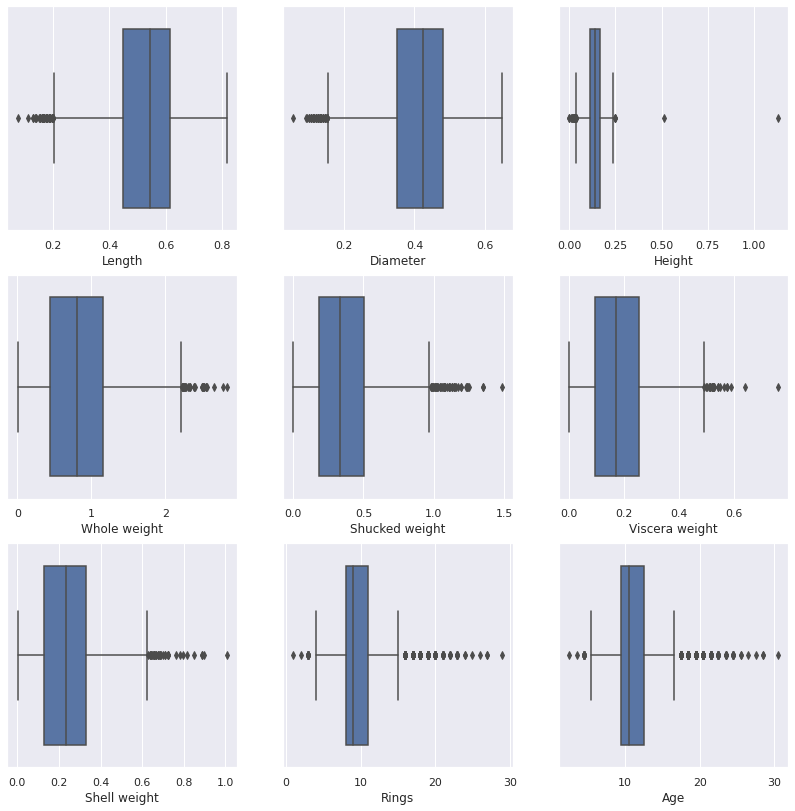

In [ ]:
sns.set_theme(style="darkgrid")
fig, ((ax1, ax2,ax3), (ax4, ax5,ax6),(ax7,ax8,ax9))= plt.subplots(nrows=3, ncols=3, figsize=(14,14))
sns.boxplot(data=df,x="Length",ax=ax1)
sns.boxplot(data=df,x="Diameter",ax=ax2)
sns.boxplot(data=df,x="Height",ax=ax3)
sns.boxplot(data=df,x="Whole weight",ax=ax4)
sns.boxplot(data=df,x="Shucked weight",ax=ax5)
sns.boxplot(data=df,x="Viscera weight",ax=ax6)
sns.boxplot(data=df,x="Shell weight",ax=ax7)
sns.boxplot(data=df,x="Rings",ax=ax8)
sns.boxplot(data=df,x="Age",ax=ax9)

**Handling Outliers**

Outlier Treatment for Shucked weight

In [ ]:
p25 = df['Shucked weight'].quantile(0.25)
p75 = df['Shucked weight'].quantile(0.75)
iqr=p75-p25
# Finding upper and lower limit
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
df[df['Shucked weight'] > upper_limit]
df[df['Shucked weight'] < lower_limit]
#Trimming the outlier
new_df = df[df['Shucked weight'] < upper_limit]
   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


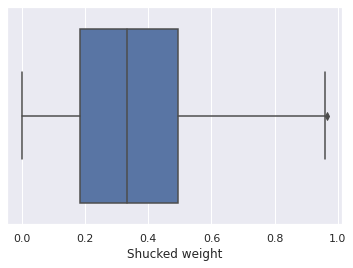

In [ ]:
sns.boxplot(new_df['Shucked weight'])

In [ ]:
p25 = df['Viscera weight'].quantile(0.25)
p75 = df['Viscera weight'].quantile(0.75)
iqr=p75-p25
# Finding upper and lower limit
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
df[df['Viscera weight'] > upper_limit]
df[df['Viscera weight'] < lower_limit]
#Trimming the outlier
new_df = df[df['Viscera weight'] < upper_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


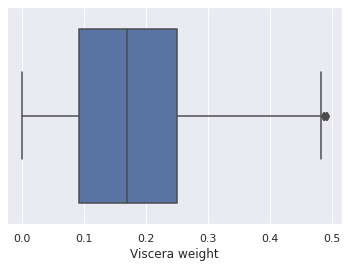

In [ ]:
sns.boxplot(new_df['Viscera weight'])

In [ ]:
p25 = df['Shell weight'].quantile(0.25)
p75 = df['Shell weight'].quantile(0.75)
iqr=p75-p25
# Finding upper and lower limit
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
df[df['Shell weight'] > upper_limit]
df[df['Shell weight'] < lower_limit]
#Trimming the outlier
new_df = df[df['Shell weight'] < upper_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


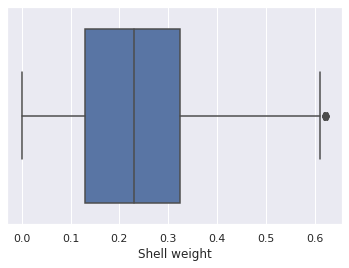

In [ ]:
sns.boxplot(new_df['Shell weight'])

In [ ]:
p25 = df['Rings'].quantile(0.25)
p75 = df['Rings'].quantile(0.75)
iqr=p75-p25
# Finding upper and lower limit
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
df[df['Rings'] > upper_limit]
df[df['Rings'] < lower_limit]
#Trimming the outlier
new_df = df[df['Rings'] < upper_limit]
new_df.shape


(3916, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


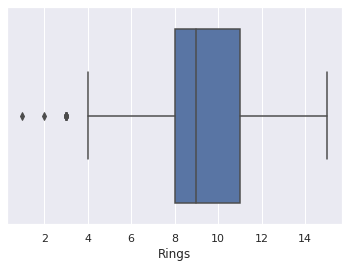

In [ ]:
sns.boxplot(new_df['Rings'])

In [ ]:
p25 = df['Length'].quantile(0.25)
p75 = df['Length'].quantile(0.75)
iqr=p75-p25
# Finding upper and lower limit
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
df[df['Length'] > upper_limit]
df[df['Length'] < lower_limit]
#Trimming the outlier
new_df = df[df['Length'] < upper_limit]
new_df.shape

(4177, 10)

In [ ]:
p25 = df['Diameter'].quantile(0.25)
p75 = df['Diameter'].quantile(0.75)
iqr=p75-p25
# Finding upper and lower limit
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
df[df['Diameter'] > upper_limit]
df[df['Diameter'] < lower_limit]
#Trimming the outlier
new_df = df[df['Diameter'] < upper_limit]
new_df.shape


(4177, 10)

In [ ]:
p25 = df['Whole weight'].quantile(0.25)
p75 = df['Whole weight'].quantile(0.75)
iqr=p75-p25
# Finding upper and lower limit
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
df[df['Whole weight'] > upper_limit]
df[df['Whole weight'] < lower_limit]
#Trimming the outlier
new_df = df[df['Whole weight'] < upper_limit]

In [ ]:
p25 = df['Height'].quantile(0.25)
p75 = df['Height'].quantile(0.75)
iqr=p75-p25
# Finding upper and lower limit
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
df[df['Height'] > upper_limit]
df[df['Height'] < lower_limit]
#Trimming the outlier
new_df = df[df['Height'] < upper_limit]

## **7. Check for Categorical columns and perform encoding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


Column 'Sex' is the only categorical variable available. Performing Label enoding on this feature

In [ ]:
label_encoder=preprocessing.LabelEncoder()
 
# Encode labels in column 'Geography'.
df['Sex']= label_encoder.fit_transform(df['Sex'])

In [ ]:
df.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Age               float64
dtype: object

## **8. Split the data into dependent and independent variables.**

In [ ]:
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,10.5


In [ ]:
df.shape

(4177, 10)

In [ ]:
df_independent=df.iloc[:,:-1]
df_independent.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df_dependent=df.iloc[:,-1]
df_dependent.head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

## **9. Scale the independent variables**

### **9.1  MinMax Scaler**

The MinMax scaler scales all the data between 0 and 1

In [ ]:
df_independent.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [ ]:
df_scaled = df_independent.copy()
col_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']
features = df_scaled[col_names]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)


In [ ]:
df_scaled.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,1.0,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.0,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714


### **9.2 Standard Scaler**

 StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1.

In [ ]:
scaler = StandardScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.151980,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,1.151980,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,-1.280690,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,1.151980,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-0.064355,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


## **10. Split the data into training and testing**

In [ ]:
#implementing Linear Regression
X = df.drop(['Age'], axis=1)
#Feature selection
# the dependent variable 
y= df[['Age']]

In [ ]:
#Now let us split the input and output features into the training set and test set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## **11. Build the Model**


### **Linear Regression**

In [ ]:
# fit the model
reg_model = LinearRegression()

## **12. Train the Model**

In [ ]:
reg_model.fit(X_train, y_train)

LinearRegression()

## **13. Test the Model**

In [ ]:
reg_model.score(X_train, y_train),reg_model.score(X_test, y_test)

(1.0, 1.0)

Here, the training-set accuracy score is **100** while the test-set accuracy is to be **100** .

In [ ]:
#predicting the model 
y_pred=reg_model.predict(X_test)

## **14. Measure the performance using Metrics**

In [ ]:
 #Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE)
import math
RMSE = math.sqrt(MSE)
print('Root Mean Squared Error is:', RMSE)



Mean Squared Error is: 2.9899967165195127e-30
Root Mean Squared Error is: 1.7291606971359002e-15


In [ ]:
# R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-Squared is:', r2)

R-Squared is: 1.0
